In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

In [2]:
#Define function to plot CDF plots

def cdf(x, plot=True,ylab='CDF', *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return plt.plot(x, y, *args, **kwargs)  if plot else (x, y), plt.ylabel('CDF')
    

In [3]:
#Function to plot both CDF

def both_cdf(fraud,normal):
    plt.title('CDF Distribution Of '+format(fraud.name))
    plt.xlabel('Amount')
    return cdf(fraud,c='r',label='fraud'),cdf(normal,c='k',label='normal'),plt.legend()
    

In [4]:
df= pd.read_csv('CC_cleaned.csv')
df.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,Incorrect CVV Entered
0,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,2,1,rideshare,06/2023,2015-03-14,2015-03-14,1803,PURCHASE,0.0,0,0,0,0
1,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,9,1,entertainment,02/2024,2015-03-14,2015-03-14,767,PURCHASE,0.0,1,0,0,0
2,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,9,1,mobileapps,08/2025,2015-03-14,2015-03-14,767,PURCHASE,0.0,0,0,0,0
3,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,9,1,mobileapps,08/2025,2015-03-14,2015-03-14,767,PURCHASE,0.0,0,0,0,0
4,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,2,1,fastfood,10/2029,2015-08-06,2015-08-06,3143,PURCHASE,0.0,1,0,0,0


In [5]:
#Change order of columns

df = df[['customerId','transactionDateTime','transactionType','creditLimit','availableMoney', 'transactionAmount','currentBalance','merchantName', 'merchantCategoryCode','acqCountry', 'posEntryMode','posConditionCode','accountOpenDate','dateOfLastAddressChange','currentExpDate','cardLast4Digits','cardPresent','expirationDateKeyInMatch', 'Incorrect CVV Entered', 'isFraud']]

df.head()

,customerId,transactionDateTime,transactionType,creditLimit,availableMoney,transactionAmount,currentBalance,merchantName,merchantCategoryCode,acqCountry,posEntryMode,posConditionCode,accountOpenDate,dateOfLastAddressChange,currentExpDate,cardLast4Digits,cardPresent,expirationDateKeyInMatch,Incorrect CVV Entered,isFraud
0,737265056,2016-08-13T14:27:32,PURCHASE,5000,5000.0,98.55,0.0,Uber,rideshare,US,2,1,2015-03-14,2015-03-14,06/2023,1803,0,0,0,0
1,737265056,2016-10-11T05:05:54,PURCHASE,5000,5000.0,74.51,0.0,AMC #191138,entertainment,US,9,1,2015-03-14,2015-03-14,02/2024,767,1,0,0,0
2,737265056,2016-11-08T09:18:39,PURCHASE,5000,5000.0,7.47,0.0,Play Store,mobileapps,US,9,1,2015-03-14,2015-03-14,08/2025,767,0,0,0,0
3,737265056,2016-12-10T02:14:50,PURCHASE,5000,5000.0,7.47,0.0,Play Store,mobileapps,US,9,1,2015-03-14,2015-03-14,08/2025,767,0,0,0,0
4,830329091,2016-03-24T21:04:46,PURCHASE,5000,5000.0,71.18,0.0,Tim Hortons #947751,fastfood,US,2,1,2015-08-06,2015-08-06,10/2029,3143,1,0,0,0


# CustomerId

In [6]:
#look at customerId, find how much fraud per customer

per_person = {}
rates = []

for cust in df.customerId.unique():
    All = df[df.customerId==cust]
    fraud_transactions = All[All.isFraud==1]
    rate_of_fraud = len(fraud_transactions)/len(All)*100
    per_person[cust]=rate_of_fraud
    if rate_of_fraud>0:
        rates.append(rate_of_fraud)

In [7]:
#Look at the differnt rates of fraud per customer
#There are some customers with all fraud transaction, those customers must be outliers and should be droped

print('Mean: '+format(np.mean(rates)))
print('Median: '+format(np.median(rates)))
print('Max: '+format(np.max(rates)))

Mean: 2.948826422987029
Median: 1.7857142857142856
Max: 100.0


In [8]:
#Set a threshold where if a customer has more than 30% of their transactions as fraud, drop them from the data set

threshold = 30   #percent

for ID,rate in per_person.items():
    if rate > threshold:
        df.drop(df[df.customerId==ID].index,inplace=True)
        
print(df.shape)

(776491, 20)


# Seperate into fraud and normal transactions

In [9]:
fraud=df[df.isFraud==1]
norm = df[df.isFraud==0]

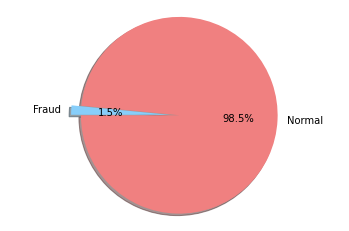

In [10]:
#This is a highly imbalanced data set

labels = 'Normal','Fraud'
sizes = [len(norm),len(fraud)]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1) 

plt.pie(sizes, explode=explode, labels=labels,colors = colors,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')
plt.show()

# Transaction Date Time

In [11]:
#Fix transactionDateTime

df.transactionDateTime = pd.to_datetime(df.transactionDateTime)

In [12]:
#Create features for the month, day of month, beginning of month, middle of month, end of month,
#day of week, hour, morning, day, evening, night, weekday, weekend


df['month'] = df.transactionDateTime.dt.month
df['day_of_month'] = df.transactionDateTime.dt.day
df['begin_of_month'] = (df.day_of_month<10).astype('uint8')
df['middle_of_month'] = ((df.day_of_month >= 10)&(df.day_of_month < 20)).astype('uint8')
df['end_of_month'] = (df.day_of_month >=20).astype('uint8')
df['day_of_week'] = df.transactionDateTime.dt.day_name()
df['hour'] = df.transactionDateTime.dt.hour
df['morning'] = df.hour.map(lambda x:1 if (x<=11)&(x>=7) else 0).astype('uint8')
df['day'] = df.hour.map(lambda x:1 if (x>=12)&(x<=18) else 0).astype('uint8')
df['evening'] = df.hour.map(lambda x:1 if (x>=19)&(x<=23) else 0).astype('uint8')
df['night'] = df.hour.map(lambda x:1 if (x>=0)&(x<=6) else 0).astype('uint8')
df['weekday'] = df.day_of_week.map(lambda x:1 if x in ['Monday','Tuesday','Wednesday','Thursday'] else 0)
df['weekend'] = df.day_of_week.map(lambda x:1 if x in ['Friday','Saturday','Sunday'] else 0)


In [13]:
#Add feature stating if transaction occured on a US holiday or not

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start=min(df.transactionDateTime), end=max(df.transactionDateTime))

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

df['holiday'] = df.transactionDateTime.dt.date.astype('datetime64').isin(holidays).replace([True,False],[1,0])

In [14]:
#create feature, where, for each cust transactions, time since last transactions


In [15]:
#update fraud and normal 
fraud=df[df.isFraud==1]
norm = df[df.isFraud==0]

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


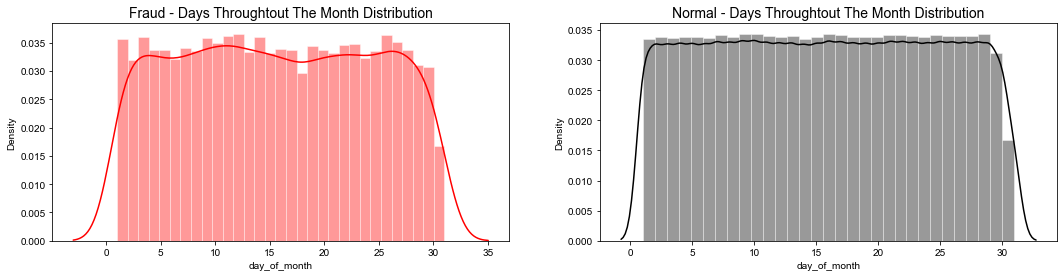

In [16]:
#It appears like there are a lot less fraud occuring towards the end of the month, but that might be because not all months have 31 days 
#Fraud activity also seems to peak in the middle of the month.

fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.day_of_month, ax=ax[0], color='r',bins=31)
ax[0].set_title('Fraud - Days Throughtout The Month Distribution', fontsize=14)

sns.distplot(norm.day_of_month, ax=ax[1], color='k',bins=31)
ax[1].set_title('Normal - Days Throughtout The Month Distribution', fontsize=14)

plt.show()

(([<matplotlib.lines.Line2D at 0x12e93b88a00>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12e93b88d90>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12e93b88fa0>)

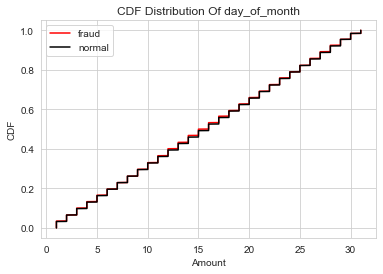

In [17]:
both_cdf(fraud.day_of_month,norm.day_of_month)

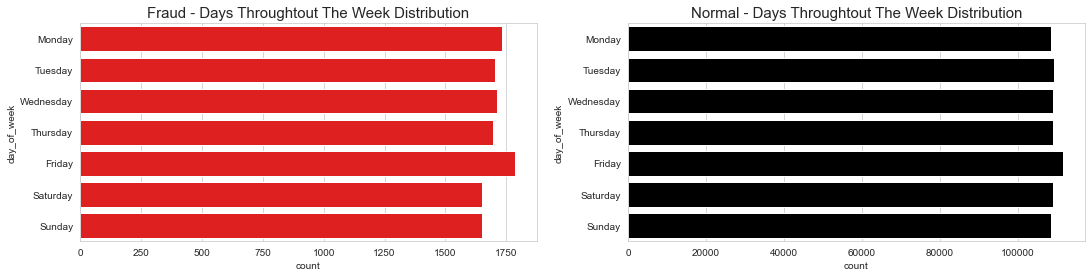

In [18]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")

sns.countplot(y=fraud.day_of_week,ax=ax[0],order = days,orient='h',color='r')
ax[0].set_title('Fraud - Days Throughtout The Week Distribution', fontsize=15)

sns.countplot(y=norm.day_of_week,ax=ax[1],order = days,orient='h',color='k')
ax[1].set_title('Normal - Days Throughtout The Week Distribution', fontsize=15)

plt.show()

(([<matplotlib.lines.Line2D at 0x12e93ca2f40>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12e93ca2520>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12e93bf5d30>)

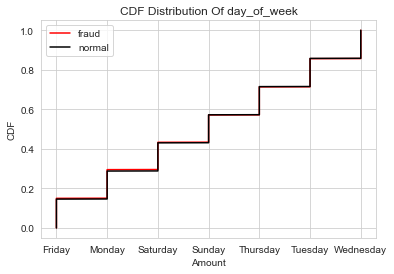

In [19]:
both_cdf(fraud.day_of_week,norm.day_of_week)

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


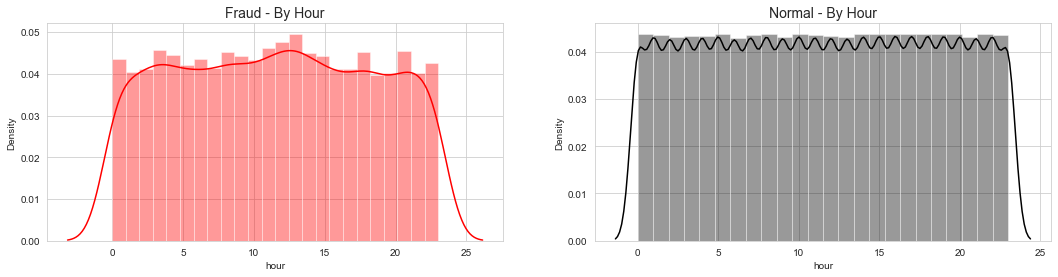

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.hour,bins=len(fraud.hour.unique()),ax=ax[0], color='r')
ax[0].set_title('Fraud - By Hour', fontsize=14)

sns.distplot(norm.hour,bins=len(norm.hour.unique()),ax=ax[1], color='k')
ax[1].set_title('Normal - By Hour', fontsize=14)

plt.show()

(([<matplotlib.lines.Line2D at 0x12ead700f70>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12ea0b1d340>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12e93c90220>)

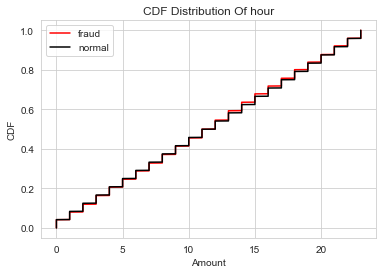

In [21]:
both_cdf(fraud.hour,norm.hour)

<ipython-input-22-1efe47f140cc>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes,  labels=labels,
<ipython-input-22-1efe47f140cc>:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes2,labels=labels,


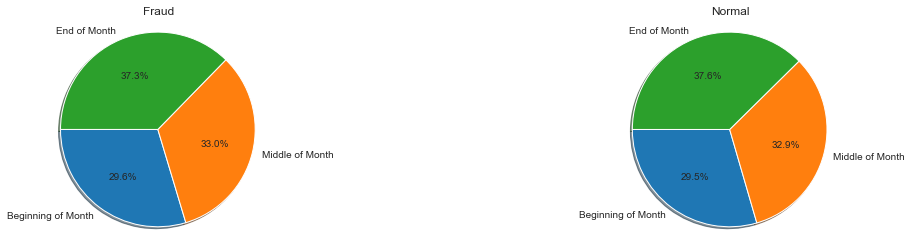

In [22]:
plt.subplot(1,3,1)


labels = 'Beginning of Month','Middle of Month','End of Month'
sizes= [np.array([fraud.begin_of_month.sum(),fraud.middle_of_month.sum(),fraud.end_of_month.sum()])]


plt.pie(sizes,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud')
plt.axis('equal')

plt.subplot(1,3,3)


sizes2= [np.array([norm.begin_of_month.sum(),norm.middle_of_month.sum(),norm.end_of_month.sum()])]


plt.pie(sizes2,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Normal')
plt.axis('equal')

plt.subplots_adjust(right=2)

plt.show()

<ipython-input-23-3da0ff38c9d1>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, labels=labels,
<ipython-input-23-3da0ff38c9d1>:19: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes2, labels=labels,


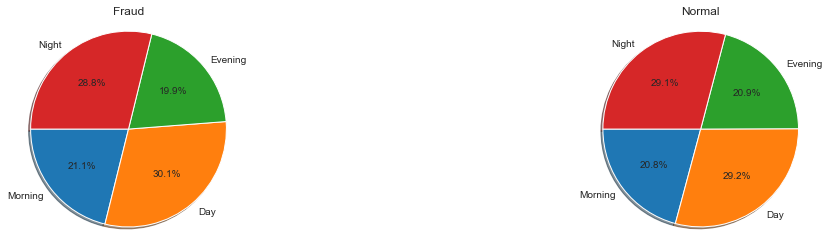

In [23]:
plt.subplot(1,3,1)


labels = 'Morning','Day','Evening','Night'
sizes= [np.array([fraud.morning.sum(),fraud.day.sum(),fraud.evening.sum(),fraud.night.sum()])]
explode = (0, 0.1,0.0,0) 

plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud')
plt.axis('equal')

plt.subplot(1,3,3)

sizes2= [np.array([norm.morning.sum(),norm.day.sum(),norm.evening.sum(),norm.night.sum()])]


plt.pie(sizes2, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Normal')
plt.axis('equal')

plt.subplots_adjust(right=2)

plt.show()

<ipython-input-24-80da4d9a7465>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes,  labels=labels,
<ipython-input-24-80da4d9a7465>:19: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes2,  labels=labels,


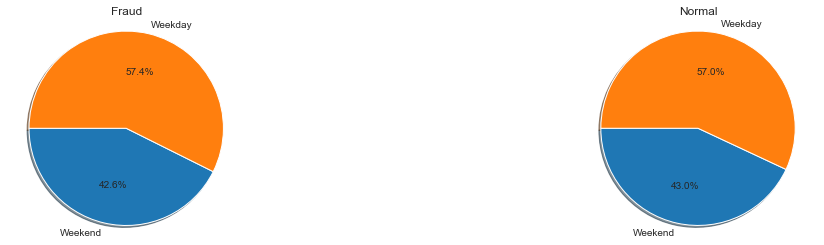

In [24]:
plt.subplot(1,3,1)


labels = 'Weekend','Weekday'
sizes= [np.array([fraud.weekend.sum(),fraud.weekday.sum()])]


plt.pie(sizes,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud')
plt.axis('equal')

plt.subplot(1,3,3)

sizes2= [np.array([norm.weekend.sum(),norm.weekday.sum()])]


plt.pie(sizes2,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Normal')
plt.axis('equal')

plt.subplots_adjust(right=2)

plt.show()

In [25]:
df=df.reset_index().drop(columns='index')

In [26]:
#Find the time difference since last transaction

#Create the new empty feature
df['time_since_last_transaction']=0     

#find the time difference between the row before it
df['time_since_last_transaction']=df['transactionDateTime'].diff(1)    

In [27]:
#Locate indexes where transaction differences are between different customers

indexes = []

for ind in df.index[1:]:
     if df.iloc[ind,0]!=df.iloc[ind-1,0]:
            indexes.append(ind)

In [28]:
#Change those indexes to 0 days
#Also change the first row's difference

df.iloc[0,34]=pd.Timedelta(0)
df.iloc[indexes,34]=pd.Timedelta(0)

In [29]:
# @@@@@@@@@@@@@@


#Why does this take so long? 

#Find difference in time from last transaction

#df['time_since_last_transaction']=0

#for row in range(1,len(df)):
#    if df.loc[row-1,'customerId']==df.loc[row,'customerId']:
#        diff = df.loc[row,'transactionDateTime']-df.loc[row-1,'transactionDateTime']
#        df.loc[row,'time_since_last_transaction']=diff
#    else:
#        df.loc[row,'time_since_last_transaction']=0


SyntaxError: invalid syntax (<ipython-input-29-5a02203c55e1>, line 1)

In [30]:
#update fraud and normal 
fraud=df[df.isFraud==1]
norm = df[df.isFraud==0]

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@

#find better way to plot time

In [ ]:
fraud.time_since_last_transaction.plot()

In [ ]:
norm.time_since_last_transaction.plot()

# Transaction Type

Fraud transactions have more purchases and less reversal types. Adress verification is pretty much the same

<ipython-input-31-36bcf094e4d4>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, explode=explode, labels=labels,


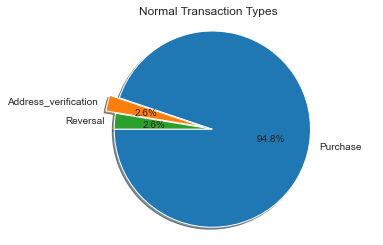

In [31]:
labels = 'Purchase','Address_verification','Reversal'
sizes = [(norm.transactionType.value_counts()/len(norm)*100).values]
explode = (0, 0.1,0.0) 


plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Normal Transaction Types')
plt.axis('equal')
plt.show()

<ipython-input-32-290b67e0af71>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, explode=explode, labels=labels,


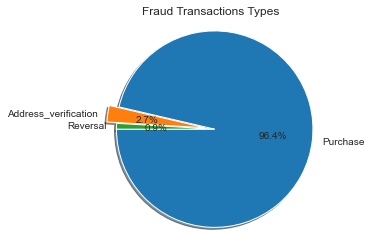

In [32]:
labels = 'Purchase','Address_verification','Reversal'
sizes= [(fraud.transactionType.value_counts()/len(fraud)*100).values]
explode = (0, 0.1,0.0) 

plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud Transactions Types')
plt.axis('equal')
plt.show()

In [33]:
df['transaction_type_per_month'] = df.groupby(['customerId','month','transactionType'])['transactionType'].transform('count')


# Credit Limit

(([<matplotlib.lines.Line2D at 0x12e95123c10>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12e95123f70>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12e9510eac0>)

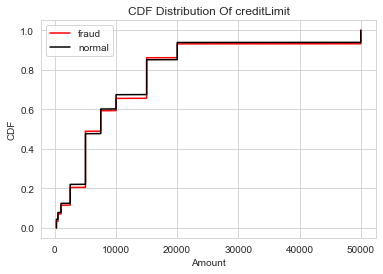

In [34]:
#Credit Limits seems to be similarly distributed between fraud and normal transactions

both_cdf(fraud.creditLimit,norm.creditLimit)

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


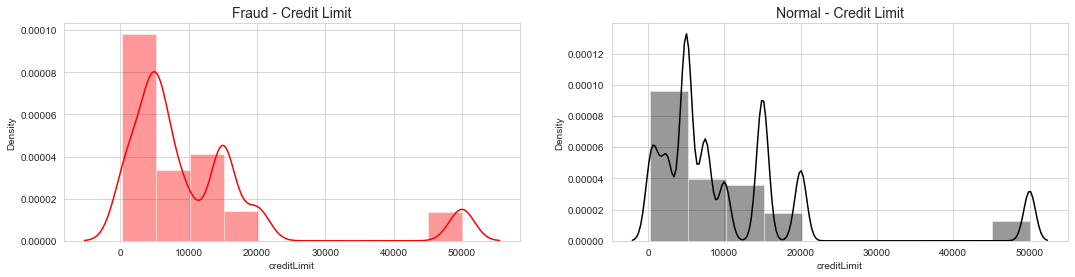

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.creditLimit,bins=len(fraud.creditLimit.unique()),ax=ax[0], color='r')
ax[0].set_title('Fraud - Credit Limit', fontsize=14)

sns.distplot(norm.creditLimit,bins=len(norm.creditLimit.unique()),ax=ax[1], color='k')
ax[1].set_title('Normal - Credit Limit', fontsize=14)

plt.show()

# Available Money

(([<matplotlib.lines.Line2D at 0x12e950e8310>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12e950e8580>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12ea4f7ca60>)

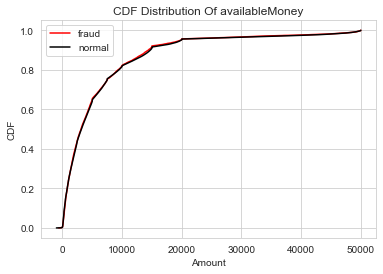

In [36]:
#Available Money also seems pretty similar 
both_cdf(fraud.availableMoney,norm.availableMoney)

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


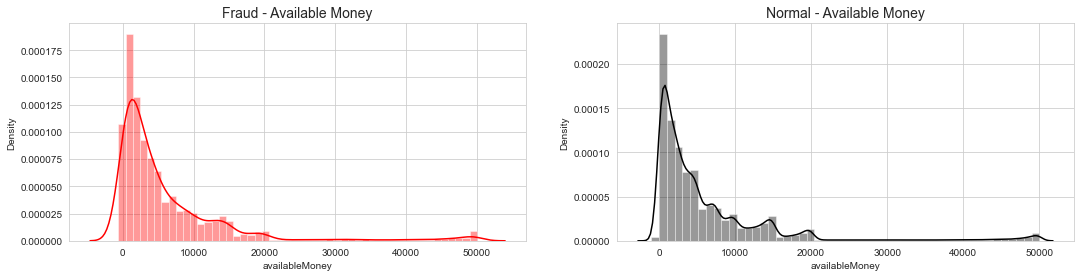

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.availableMoney,ax=ax[0], color='r')
ax[0].set_title('Fraud - Available Money', fontsize=14)

sns.distplot(norm.availableMoney,ax=ax[1], color='k')
ax[1].set_title('Normal - Available Money', fontsize=14)

plt.show()

In [ ]:
print 99

# Transaction Amount

(([<matplotlib.lines.Line2D at 0x12e93a1db50>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12e93b70310>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12e93a11af0>)

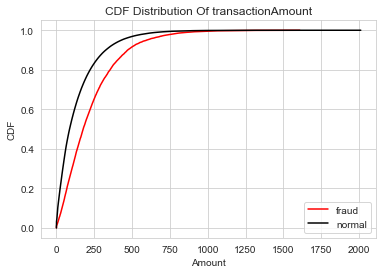

In [38]:
#Fraud transaction seems to be occuring at higher amounts than normal

both_cdf(fraud.transactionAmount,norm.transactionAmount)

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


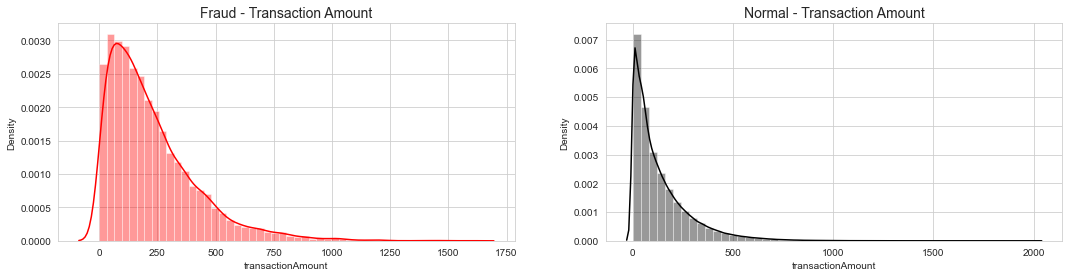

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.transactionAmount,ax=ax[0], color='r')
ax[0].set_title('Fraud - Transaction Amount', fontsize=14)

sns.distplot(norm.transactionAmount,ax=ax[1], color='k')
ax[1].set_title('Normal - Transaction Amount', fontsize=14)

plt.show()

In [ ]:
#significant difference here, look more into it and perhaps create some useful features

In [40]:
#Find the time difference since last transaction

#Create the new empty feature
df['differ_from_last_transaction_amount']=0     

#find the time difference between the row before it
df['differ_from_last_transaction_amount']=df['transactionAmount'].diff(1)    

In [44]:
#Using the same indexes from before where customers do not equal the same as the previous
#Change those indexes to 0 days
#Also change the first row's difference

df.iloc[0,36]=0
df.iloc[indexes,36]=0

In [45]:
#Update fraud and normal data

fraud=df[df.isFraud==1]
norm=df[df.isFraud==0]

(([<matplotlib.lines.Line2D at 0x12e93a0a040>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12e94600580>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12ea41a98b0>)

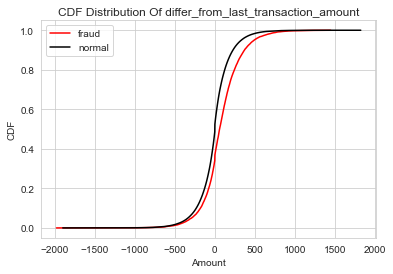

In [46]:
both_cdf(fraud.differ_from_last_transaction_amount,norm.differ_from_last_transaction_amount)

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


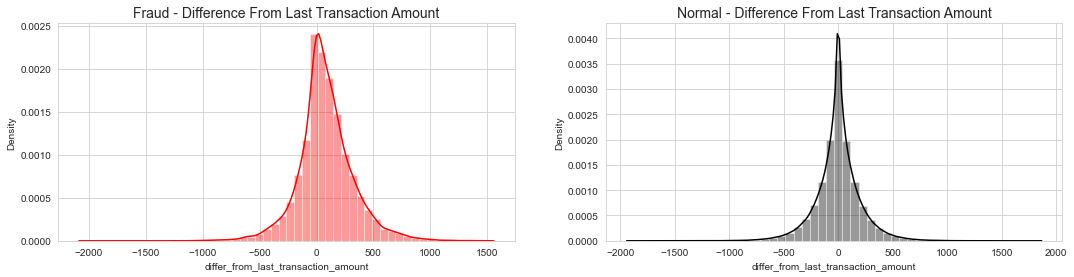

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.differ_from_last_transaction_amount,ax=ax[0], color='r')
ax[0].set_title('Fraud - Difference From Last Transaction Amount', fontsize=14)

sns.distplot(norm.differ_from_last_transaction_amount,ax=ax[1], color='k')
ax[1].set_title('Normal - Difference From Last Transaction Amount', fontsize=14)

plt.show()

# Current Balance

(([<matplotlib.lines.Line2D at 0x12ea420b6a0>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12e93bbcee0>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12e93a860d0>)

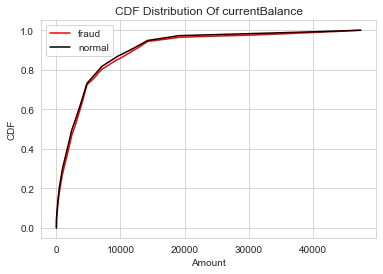

In [48]:
#The current balance of fraud and normal transactions are almost identical, but fraud transaction in general have a larger current balance

both_cdf(fraud.currentBalance,norm.currentBalance)

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


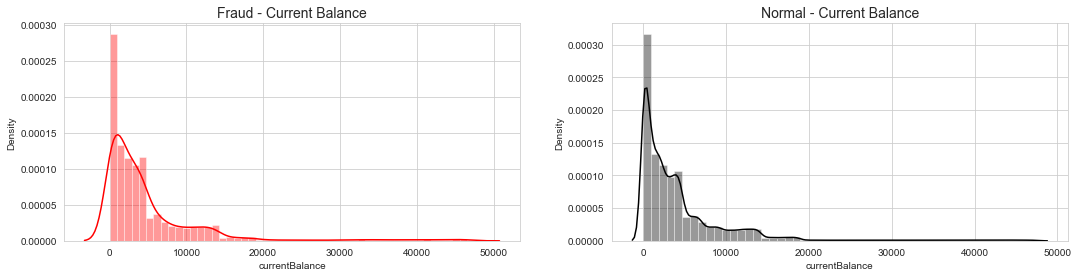

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.currentBalance,ax=ax[0], color='r')
ax[0].set_title('Fraud - Current Balance', fontsize=14)

sns.distplot(norm.currentBalance,ax=ax[1], color='k')
ax[1].set_title('Normal - Current Balance', fontsize=14)

plt.show()

# Merchant Name

In [50]:
fraud.merchantName.value_counts().head(10)

Lyft             737
ebay.com         629
Fresh Flowers    529
Uber             494
cheapfast.com    430
walmart.com      420
sears.com        407
oldnavy.com      387
staples.com      384
alibaba.com      366
Name: merchantName, dtype: int64

In [51]:
norm.merchantName.value_counts().head(10)

Uber             24797
Lyft             24478
oldnavy.com      16401
alibaba.com      16395
staples.com      16389
apple.com        16342
target.com       16274
walmart.com      16238
amazon.com       16218
cheapfast.com    16210
Name: merchantName, dtype: int64

In [52]:
print('length of unique merchant names: '+format(len(df.merchantName.unique())))

length of unique merchant names: 2489


In [53]:
#Uber, Lyft and lots of websites are on the very top counts for each transaction
#But with so many merchant names, which ones have more fraud?

#In-N-Out consistantly remain at the top, as well as locations with a # followed by some number.
#The # followed by numbers is probably the specific store, and although 10% of all transaction happening at that 
#location is a fraudulent, for our purposes the exact store is not neccesarily needed.

fraud_merchant_ratio = fraud.merchantName.value_counts()/df.merchantName.value_counts()*100

fraud_merchant_ratio.to_frame().reset_index().sort_values(by='merchantName',ascending=False).rename(columns={'index':'merchantName','merchantName':'percent'}).head(20)

,merchantName,percent
918,In-N-Out #949129,10.227273
914,In-N-Out #863086,9.473684
41,American Airlines,9.429682
2287,Walgreens #475572,7.407407
885,In-N-Out #422833,7.407407
887,In-N-Out #463194,7.368421
870,In-N-Out #17755,6.862745
891,In-N-Out #567597,6.818182
916,In-N-Out #899468,6.603774
597,Fresh Flowers,6.430829


In [54]:
#After removing the # and numbers, the information looks a lot better with less exact names but more variety of stores at the top

#Split and return only portion before the #
df.merchantName=df.merchantName.map(lambda x:x.split('#',1)[0])

#Update
fraud=df[df.isFraud==1]
norm=df[df.isFraud==0]

#Update fraud_merchant_ratio
fraud_merchant_ratio = fraud.merchantName.value_counts()/df.merchantName.value_counts()*100

print('New total length of merchant names: '+format(len(fraud.merchantName.unique())))
fraud_merchant_ratio.to_frame().reset_index().sort_values(by='merchantName',ascending=False).rename(columns={'index':'merchantName','merchantName':'percent'})

New total length of merchant names: 173


,merchantName,percent
16,American Airlines,9.429682
77,Fresh Flowers,6.430829
192,ethanallen.com,4.968944
131,Rove Concepts,4.264392
87,In-N-Out,4.136091
...,...,...
166,Virgin,NaN
178,Wayfair.com,NaN
184,abc.com,NaN
194,hulu.com,NaN


In [55]:
#There are 173 merchant names.  Some of them have no fraud activity. Most have around 2% or below
#Keep the top 10% (17) of merchant names and the rest turn to 'Other'

top_17= fraud_merchant_ratio.to_frame().reset_index().sort_values(by='merchantName',ascending=False).rename(columns={'index':'merchantName','merchantName':'percent'}).head(17)

top_17_merchants=top_17.merchantName.unique()

df.merchantName = df.merchantName.map(lambda x:'Other' if x not in list(top_17_merchants) else x)

In [56]:
#Create feature for customer's transaction towards merchantName each month

df['merchantName_monthly'] = df.groupby(['customerId', 'month','merchantName'])[['merchantName']].transform('count')

In [57]:
fraud=df[df.isFraud==1]
norm=df[df.isFraud==0]

(([<matplotlib.lines.Line2D at 0x12ea4f7cf40>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12e99a765e0>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12e99a844f0>)

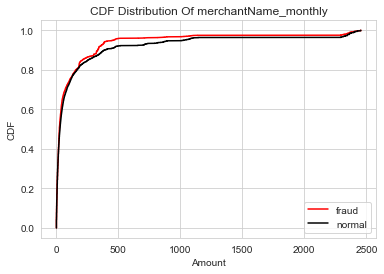

In [58]:
both_cdf(fraud.merchantName_monthly,norm.merchantName_monthly)

# Merchant Category Code 

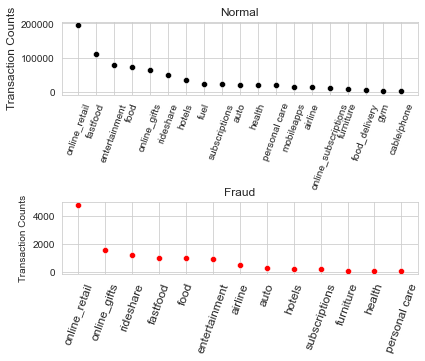

No fraud merchant codes : ['cable/phone' 'food_delivery' 'fuel' 'gym' 'mobileapps'
 'online_subscriptions']


In [59]:
#online retail, online gifts and rideshare has the most occurances of fraud
#There are some merchant codes that don't have any fraud activity at all

plt.subplot(2,1,1)
sns.scatterplot(x=norm.merchantCategoryCode.value_counts().index,y=norm.merchantCategoryCode.value_counts(),color='k')
plt.xticks(rotation=70)
plt.title('Normal')
plt.ylabel('Transaction Counts',fontsize=12)

plt.tight_layout()

plt.subplot(2,1,2)
sns.scatterplot(x=fraud.merchantCategoryCode.value_counts().index,y=fraud.merchantCategoryCode.value_counts(),color='r')
plt.xticks(rotation=70,fontsize=12)
plt.title('Fraud')
plt.ylabel('Transaction Counts')


plt.show()

print('No fraud merchant codes : '+format(np.setdiff1d(norm.merchantCategoryCode.unique(),fraud.merchantCategoryCode.unique())))

In [60]:
#Change the merchant codes where no fraud occured to 'Other'

other=['cable/phone','food_delivery','fuel', 'gym', 'mobileapps',
 'online_subscriptions']

df.merchantCategoryCode = df.merchantCategoryCode.map(lambda x:'Other' if x in other else x)

In [61]:
#Create feature for customer's transaction towards merchantCategoryCode each month

df['merchantCategoryCode_monthly'] = df.groupby(['customerId', 'month','merchantCategoryCode'])['merchantCategoryCode'].transform('count')

In [62]:
fraud=df[df.isFraud==1]
norm=df[df.isFraud==0]

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@



#OPTION 1 
    #Add merchantName and merchantCategoryCode
    #Group by customer
    #add feature counts
    #Then drop merchantName (since there are too many 'Others' and this will add too many extra columns while OneHotEncoding)
    
#OPTION 2
    #Do the same above, but keep merchantName.  OneHotEncoding merchantName and merchantCategoryCode will add 32 columns

(([<matplotlib.lines.Line2D at 0x12e94b71310>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12e94b71640>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12e9ff6f520>)

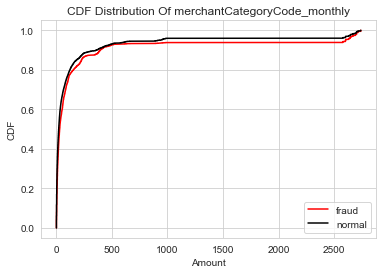

In [63]:
both_cdf(fraud.merchantCategoryCode_monthly,norm.merchantCategoryCode_monthly)

# acqCountry

In [64]:
df.acqCountry.value_counts()

US     769481
MEX      3086
CAN      2394
PR       1530
Name: acqCountry, dtype: int64

In [65]:
norm.transactionType.value_counts()

PURCHASE                724979
ADDRESS_VERIFICATION     19851
REVERSAL                 19735
Name: transactionType, dtype: int64

US     769481
MEX      3086
CAN      2394
PR       1530
Name: acqCountry, dtype: int64
US     11788
MEX       61
CAN       51
PR        26
Name: acqCountry, dtype: int64


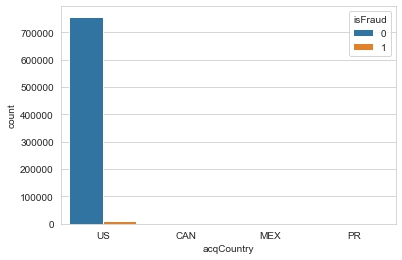

In [66]:
#Almost all transactions were made in US

sns.countplot(x='acqCountry',hue='isFraud',data=df)

print(df.acqCountry.value_counts())

print(fraud.acqCountry.value_counts())


In [67]:
def count_with_percent(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


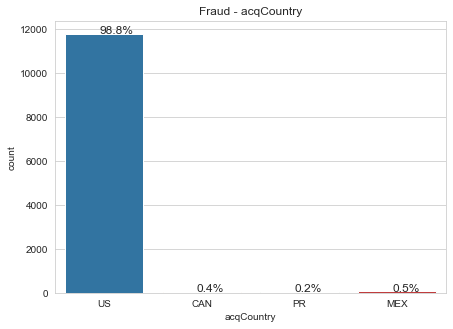

In [68]:
plt.figure(figsize = (7,5))
ax=sns.countplot('acqCountry',data=fraud)

count_with_percent(ax,fraud.acqCountry)

plt.title('Fraud - acqCountry')

plt.show()

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


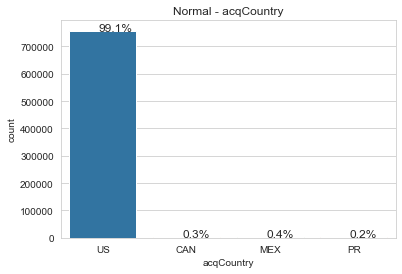

In [69]:
ax=sns.countplot('acqCountry',data=norm)

count_with_percent(ax,norm.acqCountry)

plt.title('Normal - acqCountry')

plt.show()

In [70]:
#Create feature for customer's transaction towards acqCountry each month

df['acqCountry_monthly'] = df.groupby(['customerId', 'month','acqCountry'])['acqCountry'].transform('count')

# posEntryMode

In [71]:
df.posEntryMode.value_counts()

5     312614
9     234730
2     194527
90     19431
80     15189
Name: posEntryMode, dtype: int64

(([<matplotlib.lines.Line2D at 0x12e9c852310>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12ea03fe3d0>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12e9516c7c0>)

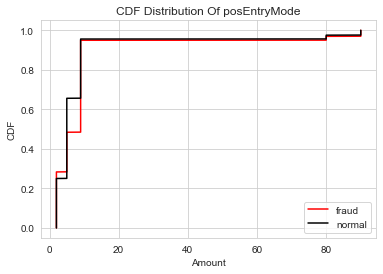

In [72]:
both_cdf(fraud.posEntryMode,norm.posEntryMode)

<ipython-input-73-23bd8a4dff6c>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes,  labels=labels,
<ipython-input-73-23bd8a4dff6c>:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes2,labels=labels,


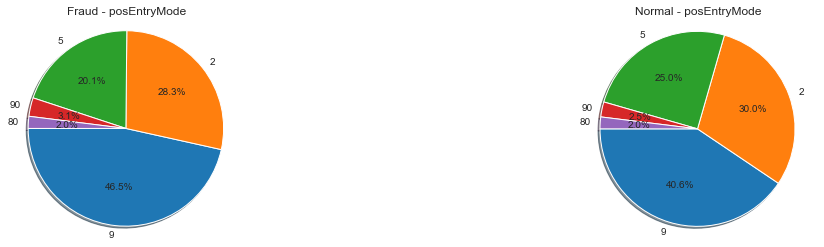

In [73]:
plt.subplot(1,3,1)


labels = '9','2','5','90','80'
sizes= [np.array([fraud.posEntryMode.value_counts()/len(fraud)*100])]


plt.pie(sizes,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud - posEntryMode')
plt.axis('equal')

plt.subplot(1,3,3)


sizes2= [np.array([norm.posEntryMode.value_counts()/len(norm)*100])]


plt.pie(sizes2,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Normal - posEntryMode')
plt.axis('equal')

plt.subplots_adjust(right=2)

plt.show()

In [74]:
#posEntryMode should be an object

df.posEntryMode.describe()

count    776491.000000
mean          9.051752
std          16.778122
min           2.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          90.000000
Name: posEntryMode, dtype: float64

In [75]:
df.posEntryMode = df.posEntryMode.astype('object')

df.posEntryMode.dtype

dtype('O')

In [76]:
#Create feature for customer's transaction for posEntryMode each month

df['posEntryMode_monthly'] = df.groupby(['customerId', 'month','posEntryMode'])['posEntryMode'].transform('count')

In [77]:
fraud=df[df.isFraud==1]
norm=df[df.isFraud==0]

(([<matplotlib.lines.Line2D at 0x12e93bd6820>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12ef6ea1070>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12e99a9a760>)

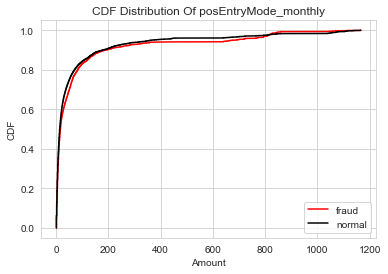

In [78]:
both_cdf(fraud.posEntryMode_monthly,norm.posEntryMode_monthly)

# posConditionCode

In [79]:
df.posConditionCode.value_counts()

1     621131
8     147946
99      7414
Name: posConditionCode, dtype: int64

(([<matplotlib.lines.Line2D at 0x12e956112e0>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12e950b9e50>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12ea06bb9d0>)

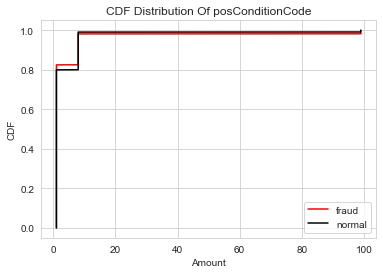

In [80]:
both_cdf(fraud.posConditionCode,norm.posConditionCode)

<ipython-input-81-d9caa9cd49e0>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes,  labels=labels,
<ipython-input-81-d9caa9cd49e0>:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes2,labels=labels,


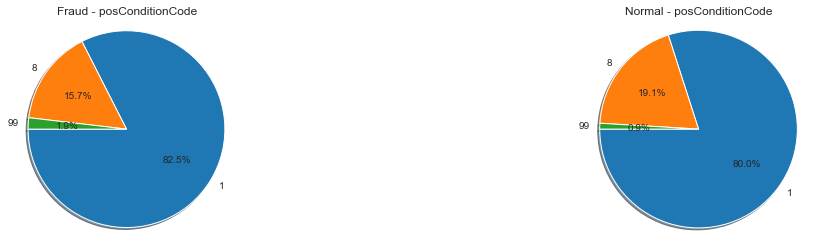

In [81]:
plt.subplot(1,3,1)


labels = '1','8','99'
sizes= [np.array([fraud.posConditionCode.value_counts()/len(fraud)*100])]


plt.pie(sizes,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud - posConditionCode')
plt.axis('equal')

plt.subplot(1,3,3)


sizes2= [np.array([norm.posConditionCode.value_counts()/len(norm)*100])]


plt.pie(sizes2,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Normal - posConditionCode')
plt.axis('equal')

plt.subplots_adjust(right=2)

plt.show()

# accountOpenDate & dateOfLastAddressChange

In [82]:
df['accountOpenDate']=pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange']=pd.to_datetime(df['dateOfLastAddressChange'])

In [83]:
df[['accountOpenDate', 'dateOfLastAddressChange']]

,accountOpenDate,dateOfLastAddressChange
0,2015-03-14,2015-03-14
1,2015-03-14,2015-03-14
2,2015-03-14,2015-03-14
3,2015-03-14,2015-03-14
4,2015-08-06,2015-08-06
...,...,...
776486,2012-08-23,2012-08-23
776487,2012-08-23,2012-08-23
776488,2012-08-23,2012-08-23
776489,2012-08-23,2012-08-23


In [84]:
normal_changed_address = norm[norm.accountOpenDate!=norm.dateOfLastAddressChange]

normal_changed_address_ratio = len(normal_changed_address)/len(norm)

print('Rate of address changes in normal activity : '+format(round(normal_changed_address_ratio,3)))

Rate of address changes in normal activity : 0.525


In [85]:
fraud_changed_address = fraud[fraud.accountOpenDate!=fraud.dateOfLastAddressChange] 

fraud_changed_address_ratio = len(fraud_changed_address)/len(fraud)

print('Rate of address changes in fraud activity : '+format(round(fraud_changed_address_ratio,3)))

Rate of address changes in fraud activity : 0.56


<ipython-input-86-bb01e091f06f>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes,  labels=labels,
<ipython-input-86-bb01e091f06f>:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes2,labels=labels,


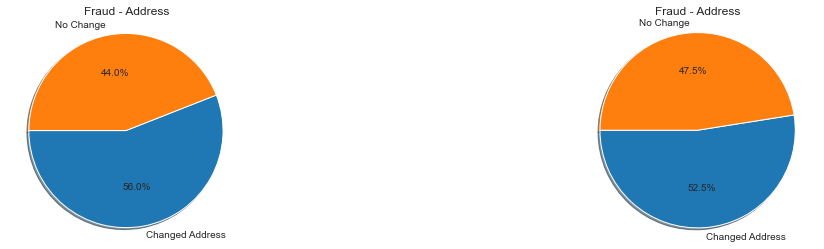

In [86]:
plt.subplot(1,3,1)


labels = 'Changed Address','No Change'
sizes= [np.array([len(fraud_changed_address)/len(fraud),1-len(fraud_changed_address)/len(fraud)])]


plt.pie(sizes,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud - Address')
plt.axis('equal')

plt.subplot(1,3,3)


sizes2= [np.array([len(normal_changed_address)/len(norm),1-len(normal_changed_address)/len(norm)])]


plt.pie(sizes2,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud - Address')
plt.axis('equal')

plt.subplots_adjust(right=2)

plt.show()

In [87]:
#Create feature where 0 if there was no address changes, 1 if address changed at least once

df['changedAddress'] = np.where(df.accountOpenDate!=df.dateOfLastAddressChange,1,0)

In [88]:
#Create feature for time since account open date to last address change
#Turn it into just the number of days

df['time_between_openDate_AddressChange'] = df.dateOfLastAddressChange - df.accountOpenDate

df['time_between_openDate_AddressChange'].astype('timedelta64[D]')

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
776486    0.0
776487    0.0
776488    0.0
776489    0.0
776490    0.0
Name: time_between_openDate_AddressChange, Length: 776491, dtype: float64

# currentExpDate

In [ ]:
#I don't think currentExpDate will provide much detail, but I will look into it to be sure

In [89]:
df.currentExpDate.value_counts()

08/2024    5035
03/2029    5035
10/2023    5028
05/2027    5006
01/2021    4979
           ... 
02/2033    4223
02/2029    4210
02/2026    4184
12/2019    3975
08/2033    1850
Name: currentExpDate, Length: 165, dtype: int64

In [90]:
df.currentExpDate.astype('O')

0         06/2023
1         02/2024
2         08/2025
3         08/2025
4         10/2029
           ...   
776486    12/2022
776487    08/2023
776488    08/2025
776489    07/2022
776490    05/2024
Name: currentExpDate, Length: 776491, dtype: object

In [91]:
#LabelEncode the values so I can visualize them better

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df['encoded_currentExpDate'] = pd.Series(LE.fit_transform(df.currentExpDate))

In [92]:
#Update 

fraud=df[df.isFraud==1]
norm=df[df.isFraud==0]

(([<matplotlib.lines.Line2D at 0x12e9c77c670>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12e9c77c8e0>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12e9c76a3d0>)

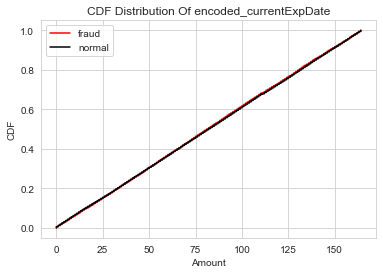

In [93]:
#distribution between the two are almost exact

both_cdf(fraud.encoded_currentExpDate,norm.encoded_currentExpDate)

In [94]:
#Drop currentExpDate and encoded_currentExpDate

df.drop(columns=['currentExpDate','encoded_currentExpDate'],inplace=True)

# cardLast4Digits

In [95]:
df.cardLast4Digits.value_counts()

593     32557
2194    10731
6002    10047
6580     6651
8502     6479
        ...  
7504        1
9910        1
1202        1
471         1
193         1
Name: cardLast4Digits, Length: 5237, dtype: int64

In [96]:
#Similarly, cardLast4Digits doesn't provide much information, but look into it just to make sure

df['encoded_cardLast4Digits'] = pd.Series(LE.fit_transform(df.cardLast4Digits))

In [97]:
#Update 

fraud=df[df.isFraud==1]
norm=df[df.isFraud==0]

(([<matplotlib.lines.Line2D at 0x12e94c8a8e0>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x12e94c8ac70>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x12e94c77730>)

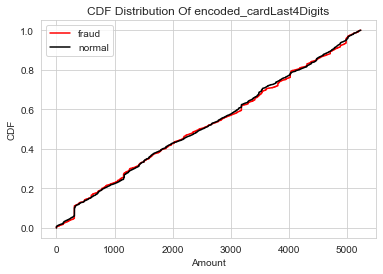

In [98]:
#There are some differences in distribution, but not enough

both_cdf(fraud.encoded_cardLast4Digits,norm.encoded_cardLast4Digits)

In [99]:
#Drop cardLat4Digits and encoded_cardLast4Digits

df.drop(columns=['cardLast4Digits','encoded_cardLast4Digits'],inplace=True)

In [100]:
df.shape

(776491, 41)

In [102]:
df.transactionAmount

0          98.55
1          74.51
2           7.47
3           7.47
4          71.18
           ...  
776486    119.92
776487     18.89
776488     49.43
776489     49.89
776490     72.18
Name: transactionAmount, Length: 776491, dtype: float64

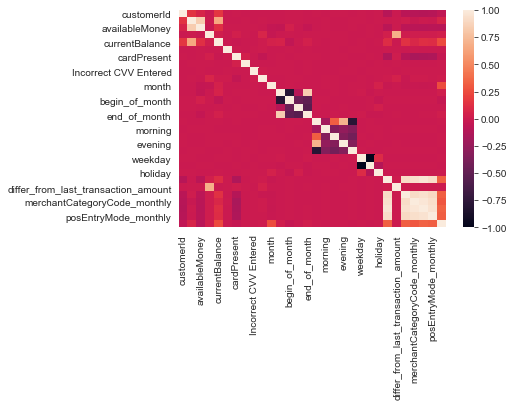

In [101]:
sns.heatmap(df.corr())

# What Next?

- Decide if I want to delete some features that doesn't show much difference for fraud and normal transactions
- See what other features I might be able to add

- For the next steps, I will need to scale numeric features, OneHotEncode object features, then drop CustomerId and datetime features (or turn then to numeric)




In [103]:

datapath = '../Springboard1'
save_file(df, 'Fraud_EDA.csv', datapath)

Writing file.  "../Springboard1\Fraud_EDA.csv"
